## Business Understanding

Upaya memastikan ketersedian pangan (padi) di Indonesia dan untuk mengatasi masalah defisitnya produksi beras di beberapa provinsi. Maka, dilakukan estimasi produksi padi  pada tahun 2023 sebagai langkah awal untuk mengambil kebijakan dan tindakan preventif lainnya.

Faktor - faktor yang dinilai berpengaruh terhadap produksi yaitu luas panen, jumlah penduduk, konsumsi rumah tangga, suhu, harga beras dan penyinaran matahari.

Judul : Estimasi Ketersediaan Padi Nasional sebagai Upaya  Meningkatkan Ketahanan Pangan Menggunakan Algoritma XGBoost

Case Problem: Estimasi


In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Understanding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/drive/MyDrive/dataset Padi baru.xlsx'
df = pd.read_excel(url)
df = pd.DataFrame(df)
df.head()

,provinsi,kode_provinsi,tahun,luas panen (ha),produktivitas (ku/ha),produksi (ton),jumlah penduduk,luas provinsi (ha),produksi beras (ton),proyeksi konsumsi rumah tangga(ton),surplus/ defisit(ton),surplus/ defisit(%)*,harga beras(Rp),suhu,curah hujan (mm),penyinaran matahari (%)
0,ACEH,11,2018,329515.78,56.49,1861567.10,5243400,5795600,1066890.0,557210.000000,509680.000000,91.470002,10182,27.08,254.76,60.18
1,ACEH,11,2019,310012.46,55.30,1714437.60,5316300,5795600,982570.0,443379.000000,539191.000000,121.609503,11134,26.90,135.34,65.74
2,ACEH,11,2020,317869.41,55.28,1757313.07,5274900,5795600,1007143.0,455749.000000,551394.000000,120.986332,11093,26.50,NaN,62.50
3,ACEH,11,2021,297058.38,55.03,1634639.60,5333700,5795600,941688.0,472355.000000,469333.000000,99.360227,9428,26.80,NaN,65.00
4,ACEH,11,2022,271750.20,55.55,1509456.00,5407900,5683909,873975.0,516389.279133,357585.720867,69.247317,10883,26.60,NaN,63.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   provinsi                             170 non-null    object 
 1   kode_provinsi                        170 non-null    int64  
 2   tahun                                170 non-null    int64  
 3   luas panen (ha)                      170 non-null    float64
 4   produktivitas (ku/ha)                170 non-null    float64
 5   produksi (ton)                       170 non-null    float64
 6   jumlah penduduk                      170 non-null    int64  
 7   luas provinsi (ha)                   170 non-null    int64  
 8   produksi beras (ton)                 170 non-null    float64
 9   proyeksi konsumsi rumah tangga(ton)  170 non-null    float64
 10  surplus/ defisit(ton)                170 non-null    float64
 11  surplus/ defisit(%)*            

In [ ]:
df.shape

(170, 16)

In [ ]:
new_columns = {'luas panen (ha)': 'luas_panen',
               'produktivitas (ku/ha)': 'produktivitas',
               'produksi (ton)': 'produksi',
               'jumlah penduduk ': 'jumlah_penduduk',
               'luas provinsi (ha)': 'luas_provinsi',
               'produksi beras (ton)': 'produksi_beras',
               'proyeksi konsumsi rumah tangga(ton)': 'konsumsi_rumah_tangga',
               'surplus/ defisit(ton)': 'surplus_defisit',
               'surplus/ defisit(%)*': 'presentase_surplus_defisit',
               'harga beras(Rp)': 'harga_beras',
               'curah hujan (mm)': 'curah_hujan',
               'penyinaran matahari (%)': 'penyinaran_matahari'}
df = df.rename(columns=new_columns)

In [ ]:
df.isnull().sum()

provinsi                        0
kode_provinsi                   0
tahun                           0
luas_panen                      0
produktivitas                   0
produksi                        0
jumlah_penduduk                 0
luas_provinsi                   0
produksi_beras                  0
konsumsi_rumah_tangga           0
surplus_defisit                 0
presentase_surplus_defisit      0
harga_beras                     0
suhu                            0
curah_hujan                   126
penyinaran_matahari             0
dtype: int64

In [ ]:
df.isna().sum()

provinsi                        0
kode_provinsi                   0
tahun                           0
luas_panen                      0
produktivitas                   0
produksi                        0
jumlah_penduduk                 0
luas_provinsi                   0
produksi_beras                  0
konsumsi_rumah_tangga           0
surplus_defisit                 0
presentase_surplus_defisit      0
harga_beras                     0
suhu                            0
curah_hujan                   126
penyinaran_matahari             0
dtype: int64

## Data Preparation

In [ ]:
df1 = df.drop(['provinsi', 'kode_provinsi', 'tahun', 'luas_provinsi', 'curah_hujan'], axis=1)
df1.head()

,luas_panen,produktivitas,produksi,jumlah_penduduk,produksi_beras,konsumsi_rumah_tangga,surplus_defisit,presentase_surplus_defisit,harga_beras,suhu,penyinaran_matahari
0,329515.78,56.49,1861567.10,5243400,1066890.0,557210.000000,509680.000000,91.470002,10182,27.08,60.18
1,310012.46,55.30,1714437.60,5316300,982570.0,443379.000000,539191.000000,121.609503,11134,26.90,65.74
2,317869.41,55.28,1757313.07,5274900,1007143.0,455749.000000,551394.000000,120.986332,11093,26.50,62.50
3,297058.38,55.03,1634639.60,5333700,941688.0,472355.000000,469333.000000,99.360227,9428,26.80,65.00
4,271750.20,55.55,1509456.00,5407900,873975.0,516389.279133,357585.720867,69.247317,10883,26.60,63.75


In [ ]:
df1.isnull().sum()

luas_panen                    0
produktivitas                 0
produksi                      0
jumlah_penduduk               0
produksi_beras                0
konsumsi_rumah_tangga         0
surplus_defisit               0
presentase_surplus_defisit    0
harga_beras                   0
suhu                          0
penyinaran_matahari           0
dtype: int64

# Korelasi

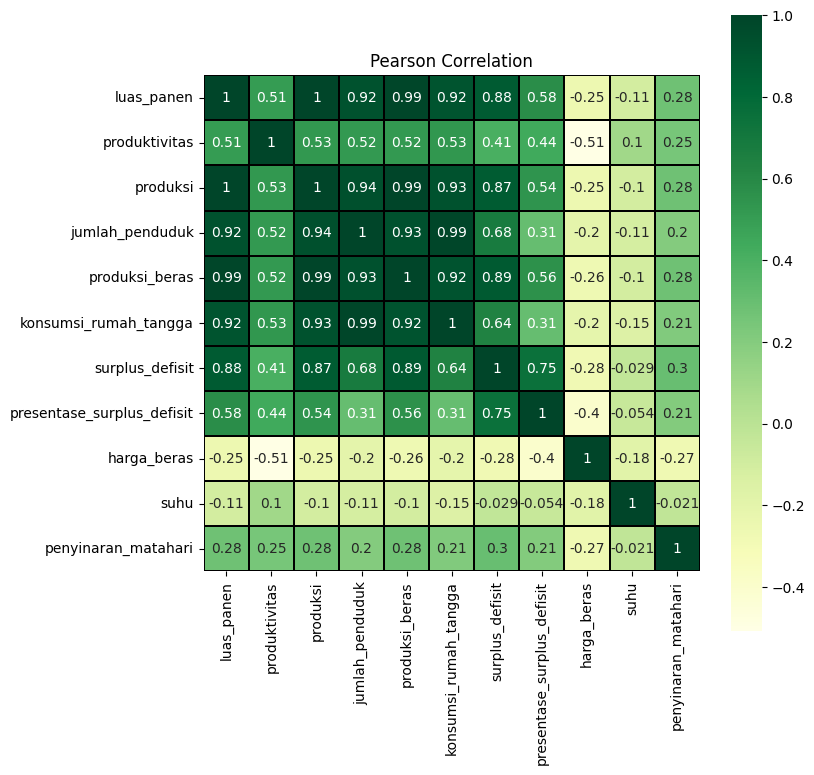

In [ ]:
f, ax=plt.subplots(figsize=(8,8))
plt.title('Pearson Correlation')
sns.heatmap(df1.astype('float').corr(), linewidths=0.25, vmax=1.0,
            square=True, cmap='YlGn', linecolor='black', annot=True)
plt.show()

Hasil analisis untuk fitur selection :

Dependent Variabel : produksi (ton)
- Ada hubungan positif menguatkan (1) antara luas panen dengan produksi
- Ada hubungan positif menguatkan (0.94) antara jumlah penduduk dengan produksi
-  Ada hubungan positif menguatkan (0.93) antara konsumsi rumah tangga dengan produksi
- Ada hubungan positif yang menguatkan (0.54) antara presentase surplus dengan defisit dengan produksi
- Ada hubungan negatif yang melemahkan (-0.1) antara suhu dengan produksi
- Ada hubungan negatif yang melemahkan (-0.25) antara harga beras dengan produksi
- Ada hubungan positif yang menguatkan (0.28) antara penyinaran matahari dan produksi

# Pemodelan Data

In [ ]:
# Input Variabel x
x = df[['luas_panen', 'jumlah_penduduk','konsumsi_rumah_tangga', 'presentase_surplus_defisit','suhu', 'harga_beras','penyinaran_matahari']]

# Target Variabel y
y = df['produksi']

In [ ]:
#Split Training and Testing

from sklearn.model_selection import train_test_split #import train_test_split function
from sklearn import metrics #import scikit-learn metrics module for accuracy calculation

In [ ]:
# Split aata Testing & Training

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

## Model Linier Regression

Regresi linear (linear regression) adalah metode yang dipakai untuk memperoleh model hubungan antara variabel dependen dan variabel independent

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ln = LinearRegression()

# Training Model

# Memodelkan data
model_ln = ln.fit(x_train, y_train)

# Melakukan predict pada data test
pred_ln = model_ln.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
# Nilai R2
print('R Square :', metrics.r2_score(y_test, pred_ln))

R Square : 0.9945391139762152


In [ ]:
# Nilai MAPE
def mape(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

print('MAPE :', mape(y_test,pred_ln))

MAPE : 229.96357588197571


## ANN (Artificial Neural Network)

Artificial Neural Network (ANN) atau Jaringan Saraf Tiruan merupakan salah satu pemodelan kompleks yang dapat memprediksi bagaimana ekosistem merespon perubahan variabel lingkungan dengan terinspirasi oleh cara kerja sistem saraf biologis, khususnya pada sel otak manusia dalam memproses informasi.

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
# ReLU : fungsi aktivasi untuk memungkinkan model menyelesaikan masalah non linier
# ReLU (Rectified Linear Unit)
mlp = MLPRegressor()

# Memodelkan Data Menggunakan Algoritma ANN
model_mlp = mlp.fit(x_train, y_train)

# Melakukan predict pada data test
pred_mlp = model_mlp.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Nilai R^2
print('R Square :', metrics.r2_score(y_test,pred_mlp))

R Square : 0.8460461511583127


In [ ]:
# Membuat Script MAPE
def mean_absolut_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true))*100
print('MAPE :', mean_absolut_percentage_error(y_test,pred_mlp))

MAPE : 3171.0573238942984


# Pemodelan XGBoost

In [ ]:
# import library
from xgboost import XGBRegressor

In [ ]:
xgr=XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.3)

# Memodelkan data menggunakan algoritma Logistic Regression
model_xgr= xgr.fit(x_train,y_train)

# melakukan predict pada data test
pred_xgr= model_xgr.predict(x_test)

In [ ]:
# Assessing Gododness-of-fit in a Regression Model
print('R Square : ', metrics.r2_score(y_test,pred_xgr).round(3))

R Square :  0.909


Nilai R Square sebesar 0.909 atau 90.9%. Nilai tersebut menunjukkan bahwa variabel x berpengaruh terhadap variabel y sebesar 90.9%.

In [ ]:
# panggil fungsi NILAI MAPE
print('MAPE : ',mean_absolut_percentage_error(y_test,pred_xgr.round(3)))

MAPE :  14.00424551825613


Nilai MAPE sebesar 14 menunjukkan bahwa kemampuan model baik untuk melakukan peramalan.

## Implementasi Model XGBoost



In [ ]:
path1='/content/drive/MyDrive/dataset padi asumsi.xlsx'

In [ ]:
load_padi=pd.read_excel(path1)
df2=pd.DataFrame(load_padi)
df2.head()

,provinsi,kode_provinsi,tahun,luas_panen,jumlah_penduduk,luas provinsi (ha),produksi_beras,konsumsi_rumah_tangga,surplus_defisit,presentase_surplus_defisit,harga_beras,suhu,penyinaran_matahari
0,ACEH,11,2023,272837.20080,5407900,5683909,0,5.163893e+05,0,69.247317,10883,26.60,63.750
1,BALI,51,2023,112769.88240,4415100,559015,0,4.538602e+05,0,-14.036307,11000,27.50,74.000
2,BANTEN,36,2023,338589.66280,12252000,966292,0,1.112361e+06,0,-8.424587,11541,28.18,52.625
3,BENGKULU,17,2023,57380.44736,2060100,1991933,0,1.994880e+05,0,-18.693366,10000,28.40,59.000
4,DI YOGYAKARTA,34,2023,111370.90880,3761900,317064,0,2.756889e+05,0,19.642087,10860,26.01,56.875


In [ ]:
df2.shape

(34, 13)

In [ ]:
df3 = df2.drop(['tahun'], axis=1)
df3.head()

,provinsi,kode_provinsi,luas_panen,jumlah_penduduk,luas provinsi (ha),produksi_beras,konsumsi_rumah_tangga,surplus_defisit,presentase_surplus_defisit,harga_beras,suhu,penyinaran_matahari
0,ACEH,11,272837.20080,5407900,5683909,0,5.163893e+05,0,69.247317,10883,26.60,63.750
1,BALI,51,112769.88240,4415100,559015,0,4.538602e+05,0,-14.036307,11000,27.50,74.000
2,BANTEN,36,338589.66280,12252000,966292,0,1.112361e+06,0,-8.424587,11541,28.18,52.625
3,BENGKULU,17,57380.44736,2060100,1991933,0,1.994880e+05,0,-18.693366,10000,28.40,59.000
4,DI YOGYAKARTA,34,111370.90880,3761900,317064,0,2.756889e+05,0,19.642087,10860,26.01,56.875


In [ ]:
x1 = df3[['luas_panen', 'jumlah_penduduk','konsumsi_rumah_tangga', 'presentase_surplus_defisit','suhu', 'harga_beras','penyinaran_matahari']]

In [ ]:
prediction = model_xgr.predict(x1)
prediction

array([1.5094548e+06, 6.1014600e+05, 1.7885820e+06, 2.5447347e+05,
       5.9041112e+05, 3.6649998e+03, 2.4013380e+05, 2.7774275e+05,
       9.4471870e+06, 9.5606170e+06, 9.6157960e+06, 7.3122694e+05,
       8.1942031e+05, 5.0482231e+05, 2.3942442e+05, 3.0534873e+04,
       6.1424910e+04, 5.0741800e+02, 2.6881600e+06, 9.2599531e+04,
       2.4487369e+04, 1.4030511e+06, 8.1129188e+05, 2.1266333e+05,
       2.3963945e+04, 2.1355684e+05, 3.5351203e+05, 2.9119012e+06,
       7.7748144e+05, 4.7896019e+05, 2.4373031e+05, 1.3735319e+06,
       2.7750692e+06, 2.0885841e+06], dtype=float32)

In [ ]:
df_result = pd.DataFrame({'Prediction' : prediction}).round(2)
df_result.head()

,Prediction
0,1.509455e+06
1,6.101460e+05
2,1.788582e+06
3,2.544735e+05
4,5.904111e+05


In [ ]:
# Menggabungkan hasil prediksi dengan data frame
df_pred_padi = pd.concat([df2,df_result], sort=True, axis=1)
df_pred_padi.head()

,provinsi,kode_provinsi,tahun,luas_panen,jumlah_penduduk,luas provinsi (ha),produksi_beras,konsumsi_rumah_tangga,surplus_defisit,presentase_surplus_defisit,harga_beras,suhu,penyinaran_matahari,Prediction
0,ACEH,11,2023,272837.20080,5407900,5683909,0,5.163893e+05,0,69.247317,10883,26.60,63.750,1.509455e+06
1,BALI,51,2023,112769.88240,4415100,559015,0,4.538602e+05,0,-14.036307,11000,27.50,74.000,6.101460e+05
2,BANTEN,36,2023,338589.66280,12252000,966292,0,1.112361e+06,0,-8.424587,11541,28.18,52.625,1.788582e+06
3,BENGKULU,17,2023,57380.44736,2060100,1991933,0,1.994880e+05,0,-18.693366,10000,28.40,59.000,2.544735e+05
4,DI YOGYAKARTA,34,2023,111370.90880,3761900,317064,0,2.756889e+05,0,19.642087,10860,26.01,56.875,5.904111e+05


In [ ]:
df_pred_padi['Prediction'].sum()

52758116.0

Estimasi total produksi padi tahun 2023 yaitu sebesar 52,758,116 ton

In [ ]:
df_before = df.groupby('tahun').agg(total_prod = ('produksi', 'sum'))
df_before

,total_prod
tahun,
2018,59200533.72
2019,54604033.34
2020,54649202.24
2021,54415294.22
2022,54748975.85


In [ ]:
# Eksport To CSV
# Export as download if in colab
from google.colab import files

# Eksport To Excel
df_pred_padi.to_excel('data estimasi.xlsx', sheet_name='Sheet1')
files.download('data estimasi.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ARIMA

ARIMA atau Auto Regressive Integrated Moving Average adalah model yang banyak dipakai dalam peramalan data time series univariat. Sesuai namanya, model ARIMA terdiri 3 komponen yaitu Auto Regressive (AR), Integrated (I) dan Moving Average (MA) dan dinotasikan sebagai ARIMA(p, d, q).

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.9 MB/s eta 0:00:00


In [ ]:
path2 = '/content/drive/MyDrive/dataset Padi baru_arima.xlsx'
df_2 = pd.read_excel(path2)
df_2 = pd.DataFrame(df_2)
df_2.head()

,provinsi,kode_provinsi,tahun,luas panen (ha),produktivitas (ku/ha),produksi (ton),jumlah penduduk,luas provinsi (ha),produksi beras (ton),proyeksi konsumsi rumah tangga(ton),surplus/ defisit(ton),surplus/ defisit(%)*,harga beras(Rp),suhu,penyinaran matahari (%)
0,ACEH,11,2018,329515.78,56.49,1861567.10,5243400,5795600,1066890.0,557210.000000,509680.000000,91.470002,10182,27.08,60.18
1,ACEH,11,2019,310012.46,55.30,1714437.60,5316300,5795600,982570.0,443379.000000,539191.000000,121.609503,11134,26.90,65.74
2,ACEH,11,2020,317869.41,55.28,1757313.07,5274900,5795600,1007143.0,455749.000000,551394.000000,120.986332,11093,26.50,62.50
3,ACEH,11,2021,297058.38,55.03,1634639.60,5333700,5795600,941688.0,472355.000000,469333.000000,99.360227,9428,26.80,65.00
4,ACEH,11,2022,271750.20,55.55,1509456.00,5407900,5683909,873975.0,516389.279133,357585.720867,69.247317,10883,26.60,63.75


In [ ]:
new_columns = {'luas panen (ha)': 'luas_panen',
               'produktivitas (ku/ha)': 'produktivitas',
               'produksi (ton)': 'produksi',
               'jumlah penduduk ': 'jumlah_penduduk',
               'luas provinsi (ha)': 'luas_provinsi',
               'produksi beras (ton)': 'produksi_beras',
               'proyeksi konsumsi rumah tangga(ton)': 'konsumsi_rumah_tangga',
               'surplus/ defisit(ton)': 'surplus_defisit',
               'surplus/ defisit(%)*': 'presentase_surplus_defisit',
               'harga beras(Rp)': 'harga_beras',
               'curah hujan (mm)': 'curah_hujan',
               'penyinaran matahari (%)': 'penyinaran_matahari'}
df_2 = df_2.rename(columns=new_columns)

In [ ]:
df_3 = df_2.groupby('tahun')\
                .agg(total_prod = ('produksi', 'sum'),
                total_luas_panen = ('luas_panen', 'mean'),
                total_krt = ('konsumsi_rumah_tangga', 'sum'),
                total_supdef = ('surplus_defisit', 'mean'),

                     )

df_3

,total_prod,total_luas_panen,total_krt,total_supdef
tahun,,,,
2018,5.920053e+07,334645.130588,2.504300e+07,222209.809995
2019,5.460403e+07,314055.504412,2.054333e+07,278522.125441
2020,5.464920e+07,313449.263529,2.088212e+07,307422.794118
2021,5.441529e+07,306229.447647,2.205964e+07,251013.108647
2022,5.474898e+07,307488.769412,2.411610e+07,221569.574334
2023,5.275811e+07,308718.724489,2.411610e+07,188100.300883


<Axes: xlabel='tahun'>

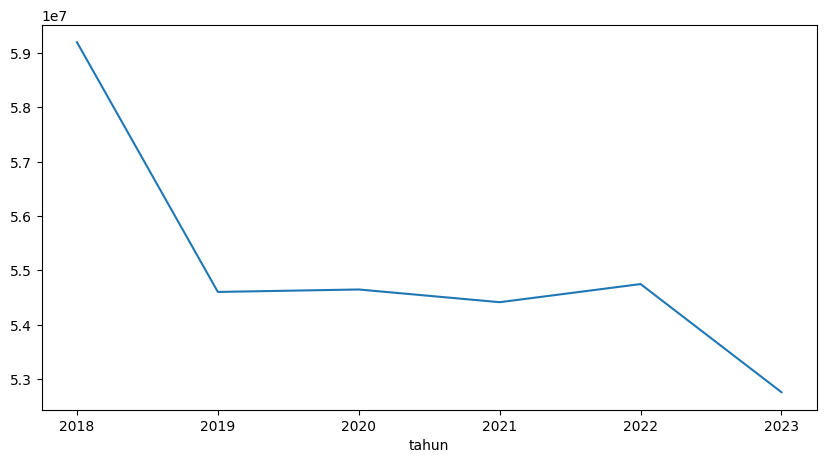

In [ ]:
df_3['total_prod'].plot(figsize=(10,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF ", dftest[0])
  print("2. P-Value ", dftest[1])
  print("3. Num Of Lags ", dftest[2])
  print("4. Num Of Observations Uses For ADF Regression and Critical Values Calulations ", dftest[3])
  print("5. Critical Values ")
  for key, val in dftest[4].items():
    print("\t", key, ": ", val)

In [ ]:
ad_test(df_3['total_prod'])

1. ADF  -4.005707223986137
2. P-Value  0.0013809196364114812
3. Num Of Lags  0
4. Num Of Observations Uses For ADF Regression and Critical Values Calulations  5
5. Critical Values 
	 1% :  -6.045114
	 5% :  -3.9292800000000003
	 10% :  -2.98681


In [ ]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df_3['total_prod'], trace=True,
                          suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=194.962, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=222.930, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=232.923, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.765 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    6
Model:                        SARIMAX   Log Likelihood                 -95.481
Date:                Wed, 14 Jun 2023   AIC                            194.962
Time:                        04:07:10   BIC                            194.545
Sample:                             0   HQIC                           193.295
                                  - 6                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.506e+07   1.32e+06     41.749      0.000    5.25e+07    5.76e+07
sigma2      3.889e+12   3.26e+12      1.193      0.233    -2.5e+12    1.03e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.95   Prob(JB):                         0.43
Heteroskedasticity (H):               0.31   Skew:                             1.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
print(df_3.shape)
train=df_3.iloc[:-3]
test=df_3.iloc[-3:]
print(train.shape, test.shape)

(6, 4)
(3, 4) (3, 4)


In [ ]:
 model = ARIMA(train['total_prod'], order=(1,0,0))
 model = model.fit()
 model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             total_prod   No. Observations:                    3
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -48.366
Date:                Wed, 14 Jun 2023   AIC                            102.732
Time:                        04:07:11   BIC                            100.028
Sample:                             0   HQIC                            97.296
                                  - 3                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.615e+07   3.31e+06     16.977      0.000    4.97e+07    6.26e+07
ar.L1         -0.4721      2.872     -0.164      0.869      -6.100       5.156
sigma2       2.08e+12      3.287   6.33e+11      0.000    2.08e+12    2.08e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.29
Prob(Q):                              0.99   Prob(JB):                         0.86
Heteroskedasticity (H):                nan   Skew:                             0.17
Prob(H) (two-sided):                   nan   Kurtosis:                         1.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.16e+27. Standard errors may be unstable.
"""

In [ ]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)
#pred.index=df.index[start:end+1]
#print(pred)

3    5.686041e+07
4    5.581645e+07
5    5.630933e+07
Name: predicted_mean, dtype: float64


<Axes: xlabel='tahun'>

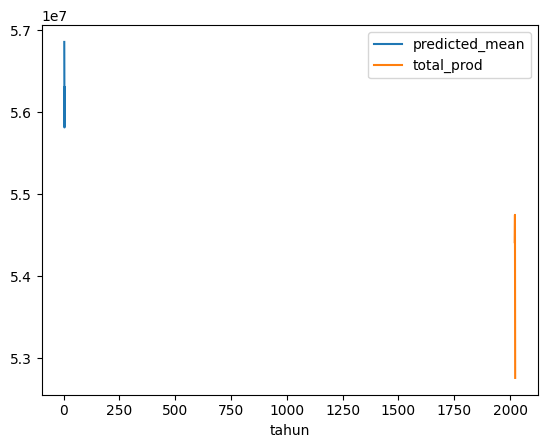

In [ ]:
pred.plot(legend=True)
test['total_prod'].plot(legend=True)

In [ ]:
test['total_prod'].mean()

53974128.09367635

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['total_prod']))
print(rmse)

2564448.8941237163


In [ ]:
model2 = ARIMA(df_3['total_prod'], order=(1,0,0))
model2 = model2.fit()
df_3.tail()

,total_prod,total_luas_panen,total_krt,total_supdef
tahun,,,,
2019,5.460403e+07,314055.504412,2.054333e+07,278522.125441
2020,5.464920e+07,313449.263529,2.088212e+07,307422.794118
2021,5.441529e+07,306229.447647,2.205964e+07,251013.108647
2022,5.474898e+07,307488.769412,2.411610e+07,221569.574334
2023,5.275811e+07,308718.724489,2.411610e+07,188100.300883


In [ ]:
start_year = 2024
end_year = 2029

index_future_years = pd.date_range(start=str(start_year), end=str(end_year), freq='Y')

pred = model2.predict(start=len(df_3), end=len(df_3)+len(index_future_years)-1, typ='levels').rename('ARIMA Predictions')
pred.index = index_future_years

print(pred)

2024-12-31    5.559936e+07
2025-12-31    5.493772e+07
2026-12-31    5.509180e+07
2027-12-31    5.505592e+07
2028-12-31    5.506427e+07
Freq: A-DEC, Name: ARIMA Predictions, dtype: float64


<Axes: >

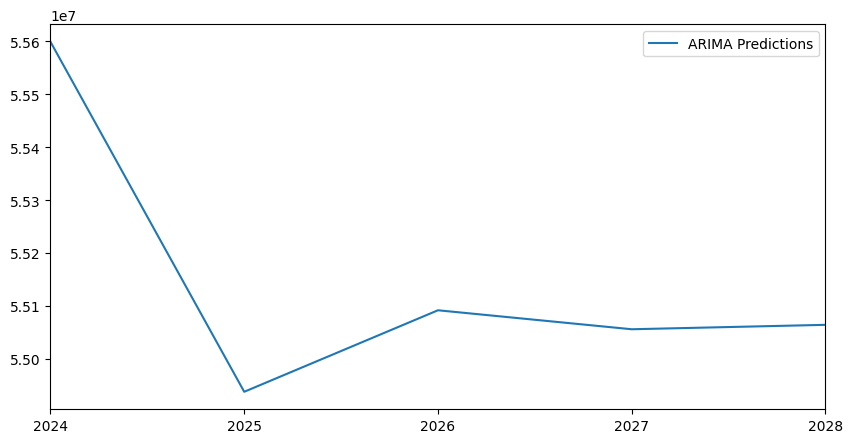

In [ ]:
pred.plot(figsize=(10,5),legend=True)

In [ ]:
# Eksport To CSV
# Export as download if in colab
from google.colab import files

# Eksport To Excel
pred.to_excel('data prediksi  ARIMA.xlsx', sheet_name='Sheet1')
files.download('data prediksi  ARIMA.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>